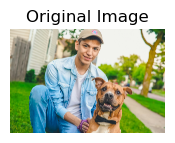

In [3]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt

# Path to the image I want to test
IMAGE_PATH = r"C:\Users\Dell\Downloads\photo-1529511026851-6fe7f6c908a3.jfif"

# Open the image and convert to RGB
img = Image.open(IMAGE_PATH).convert("RGB")

# Show the image so I can see what it looks like before running Mask R-CNN
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [3]:
%matplotlib inline

# All the imports I need
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# ---------------- COCO Labels ----------------
# These are the names of all the objects the model can detect.
# Mask R-CNN returns numbers (IDs), so I use this list to convert those numbers into actual names.
COCO_LABELS = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus",
    "train", "truck", "boat", "traffic light", "fire hydrant", "N/A", "stop sign",
    "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "N/A", "backpack", "umbrella", "N/A",
    "N/A", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "N/A", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut",
    "cake", "chair", "couch", "potted plant", "bed", "N/A", "dining table", "N/A",
    "N/A", "toilet", "N/A", "tv", "laptop", "mouse", "remote", "keyboard",
    "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "N/A",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Path to the image I want to test
IMAGE_PATH = r"C:\Users\Dell\Downloads\photo-1529511026851-6fe7f6c908a3.jfif"

# ---------------- Load the model ----------------
# Loading a ready-made Mask R-CNN model that is already trained on the COCO dataset.
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()   # Set model to evaluation mode 

# ---------------- Load my image ----------------
# Opening the image from my computer and making sure it's in RGB format.
img = Image.open(IMAGE_PATH).convert("RGB")

# ---------------- Convert the image to a tensor ----------------
# The model only understands tensors, so I convert the image.
transform = transforms.ToTensor()
img_tensor = transform(img)

# ---------------- Run the model on my image ----------------
# No gradients needed since I'm only doing prediction.
with torch.no_grad():
    outputs = model([img_tensor])

# Getting the outputs from the model
output = outputs[0]
scores = output["scores"]
boxes = output["boxes"]
masks = output["masks"]
labels = output["labels"]

# ---------------- Filter predictions ----------------
# Keeping only the objects the model is very confident about (above 0.8 score).
threshold = 0.8
keep = scores > threshold

boxes = boxes[keep]
masks = masks[keep]
labels = labels[keep]
scores = scores[keep]

# ---------------- Print what the model found ----------------
print("Detected objects:", len(scores))
for i in range(len(scores)):
    label_id = int(labels[i])
    label_name = COCO_LABELS[label_id]
    print(f"\nObject {i+1}: {label_name} (ID={label_id})")
    print("  Confidence:", float(scores[i]))
    print("  Box:", boxes[i].tolist())
    print("  Mask shape:", list(masks[i].shape))


Detected objects: 2

Object 1: person (ID=1)
  Confidence: 0.9995875954627991
  Box: [446.90789794921875, 25.59758758544922, 1977.732421875, 1979.169677734375]
  Mask shape: [1, 2004, 3000]

Object 2: dog (ID=18)
  Confidence: 0.9931926131248474
  Box: [1424.30908203125, 950.4180297851562, 2384.66796875, 1985.199951171875]
  Mask shape: [1, 2004, 3000]
